In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

# Show all columns on output
pd.set_option('display.max_columns', 999)

In [73]:
# Load CSVs
df = pd.read_csv(r"C:\Users\USER\Downloads\Maven_Cafe\Data\maven_cafe.csv", low_memory=False)

In [74]:
maven_cafe = df.copy()

In [75]:
print("Duplicates in df:", maven_cafe.duplicated().sum())

Duplicates in df: 0


In [76]:
maven_cafe

,customer_id,event,value,Amount,became_member_on,gender,age,income,offer_id,offer_type,difficulty,reward,duration,channels,time_in_days,web,email,mobile,social,age_group,income_group
0,0009655768c64bdeb2e877511632db8f,offer viewed,fafdcd668e3743c1bb461111dcafc2a4,NaN,2017-04-21,M,33.00,72000.00,fafdcd668e3743c1bb461111dcafc2a4,discount,10.00,2.00,10.00,"['web', 'email', 'mobile', 'social']",22.50,1,1,1,1,Early Career Professionals,Middle Income
1,0009655768c64bdeb2e877511632db8f,offer received,5a8bc65990b245e5a138643cd4eb9837,NaN,2017-04-21,M,33.00,72000.00,5a8bc65990b245e5a138643cd4eb9837,informational,0.00,0.00,3.00,"['email', 'mobile', 'social']",7.00,0,1,1,1,Early Career Professionals,Middle Income
2,0009655768c64bdeb2e877511632db8f,offer received,f19421c1d4aa40978ebb69ca19b0e20d,NaN,2017-04-21,M,33.00,72000.00,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5.00,5.00,5.00,"['web', 'email', 'mobile', 'social']",17.00,1,1,1,1,Early Career Professionals,Middle Income
3,0009655768c64bdeb2e877511632db8f,transaction,NaN,8.57,2017-04-21,M,33.00,72000.00,NaN,NaN,NaN,NaN,NaN,NaN,17.25,0,0,0,0,Early Career Professionals,Middle Income
4,0009655768c64bdeb2e877511632db8f,offer viewed,f19421c1d4aa40978ebb69ca19b0e20d,NaN,2017-04-21,M,33.00,72000.00,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5.00,5.00,5.00,"['web', 'email', 'mobile', 'social']",19.00,1,1,1,1,Early Career Professionals,Middle Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272383,ffff82501cea40309d5fdd7edcca4a07,offer completed,fafdcd668e3743c1bb461111dcafc2a4,NaN,2016-11-25,F,45.00,62000.00,fafdcd668e3743c1bb461111dcafc2a4,discount,10.00,2.00,10.00,"['web', 'email', 'mobile', 'social']",2.50,1,1,1,1,Mature Professionals,Middle Income
272384,ffff82501cea40309d5fdd7edcca4a07,offer completed,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,2016-11-25,F,45.00,62000.00,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5.00,5.00,7.00,"['web', 'email', 'mobile']",21.00,1,1,1,0,Mature Professionals,Middle Income
272385,ffff82501cea40309d5fdd7edcca4a07,offer viewed,fafdcd668e3743c1bb461111dcafc2a4,NaN,2016-11-25,F,45.00,62000.00,fafdcd668e3743c1bb461111dcafc2a4,discount,10.00,2.00,10.00,"['web', 'email', 'mobile', 'social']",0.25,1,1,1,1,Mature Professionals,Middle Income
272386,ffff82501cea40309d5fdd7edcca4a07,offer completed,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,2016-11-25,F,45.00,62000.00,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,20.00,5.00,10.00,"['web', 'email']",8.25,1,1,0,0,Mature Professionals,Middle Income


In [77]:
# Filter only transaction events
df_transactions = maven_cafe[maven_cafe['event'] == 'transaction']

# Get latest day in the dataset
latest_day = df_transactions['time_in_days'].max()

# Aggregate RFM
rfm_df = df_transactions.groupby('customer_id', as_index=False).agg(
    MonetaryValue=('Amount', 'sum'),
    Frequency=('time_in_days', 'count'),  # or .size()
    LastPurchase=('time_in_days', 'max')
)

# Calculate Recency
rfm_df['Recency'] = latest_day - rfm_df['LastPurchase']

# Optional: Drop LastPurchase if you don’t need it
rfm_df.drop(columns='LastPurchase', inplace=True)

rfm_df.head()

,customer_id,MonetaryValue,Frequency,Recency
0,0009655768c64bdeb2e877511632db8f,127.60,8,0.75
1,0011e0d4e6b944f998e987f904e8c1e5,79.46,5,2.50
2,0020c2b971eb4e9188eac86d93036a77,196.86,8,0.25
3,0020ccbbb6d84e358d3414a3ff76cffd,154.05,12,1.75
4,003d66b6608740288d6cc97a6903f4f0,48.34,18,0.75


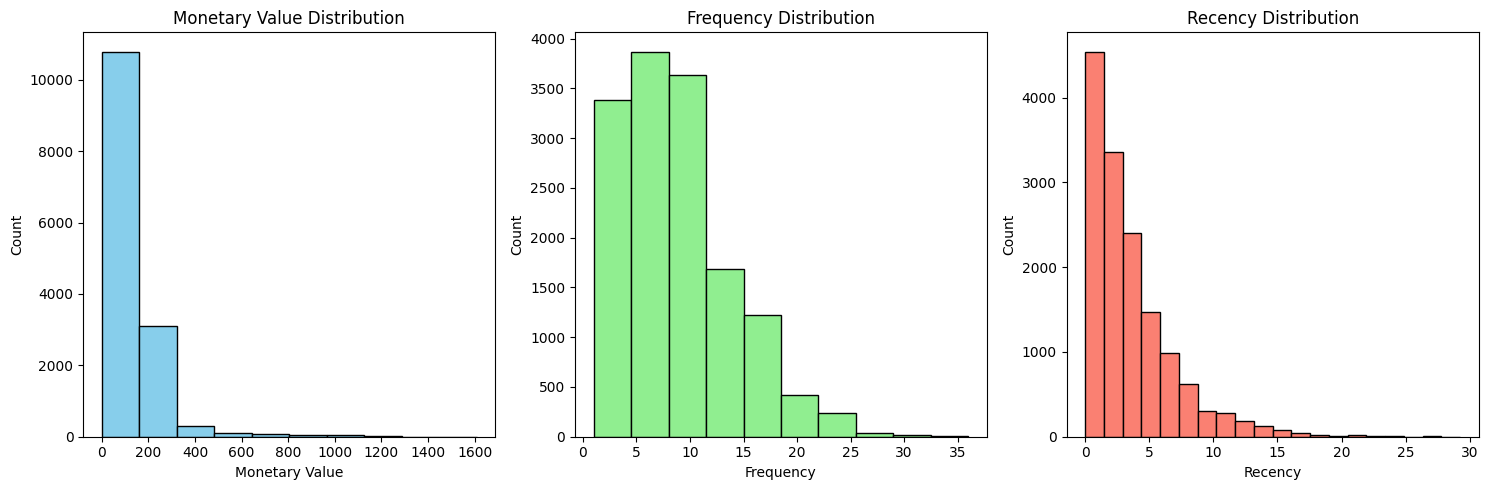

In [78]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(rfm_df['MonetaryValue'], bins=10, color='skyblue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(rfm_df['Frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(rfm_df['Recency'], bins=20, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

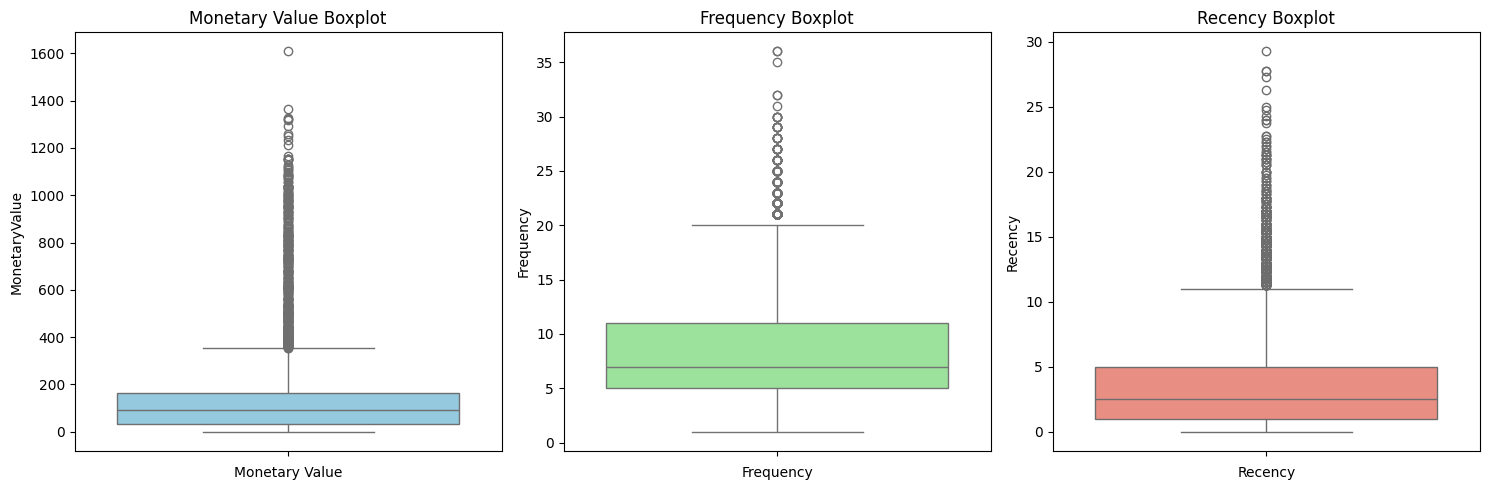

In [79]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=rfm_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=rfm_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=rfm_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

In [80]:
M_Q1 = rfm_df["MonetaryValue"].quantile(0.25)
M_Q3 = rfm_df["MonetaryValue"].quantile(0.75)
M_IQR = M_Q3 - M_Q1

monetary_outliers_df = rfm_df[(rfm_df["MonetaryValue"] > (M_Q3 + 1.5 * M_IQR)) | (rfm_df["MonetaryValue"] < (M_Q1 - 1.5 * M_IQR))].copy()

monetary_outliers_df.describe()

,MonetaryValue,Frequency,Recency
count,470.00,470.00,470.00
mean,630.92,12.52,2.47
std,250.01,5.29,2.30
min,355.68,2.00,0.00
25%,405.56,9.00,0.75
50%,560.86,12.00,1.75
75%,808.53,16.00,3.50
max,1608.69,31.00,12.75


In [81]:
F_Q1 = rfm_df['Frequency'].quantile(0.25)
F_Q3 = rfm_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

frequency_outliers_df = rfm_df[(rfm_df['Frequency'] > (F_Q3 + 1.5 * F_IQR)) | (rfm_df['Frequency'] < (F_Q1 - 1.5 * F_IQR))].copy()

frequency_outliers_df.describe()

,MonetaryValue,Frequency,Recency
count,399.00,399.00,399.00
mean,157.54,23.13,1.44
std,145.61,2.47,1.40
min,38.34,21.00,0.00
25%,70.39,21.00,0.50
50%,89.21,22.00,1.00
75%,189.12,24.00,2.00
max,1040.98,36.00,8.25


In [82]:
F_Q1 = rfm_df['Recency'].quantile(0.25)
F_Q3 = rfm_df['Recency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

recency_outliers_df = rfm_df[(rfm_df['Recency'] > (F_Q3 + 1.5 * F_IQR)) | (rfm_df['Recency'] < (F_Q1 - 1.5 * F_IQR))].copy()

recency_outliers_df.describe()

,MonetaryValue,Frequency,Recency
count,578.00,578.00,578.00
mean,55.84,3.31,14.27
std,72.32,2.07,2.99
min,0.28,1.00,11.25
25%,17.95,2.00,12.25
50%,40.70,3.00,13.50
75%,72.05,4.00,15.44
max,946.98,15.00,29.25


In [83]:
non_outliers_df = rfm_df[
    (~rfm_df.index.isin(monetary_outliers_df.index)) &
    (~rfm_df.index.isin(frequency_outliers_df.index)) &
    (~rfm_df.index.isin(recency_outliers_df.index))
]
non_outliers_df.describe()

,MonetaryValue,Frequency,Recency
count,13084.00,13084.00,13084.00
mean,104.25,8.24,3.13
std,80.27,4.42,2.59
min,0.15,1.00,0.00
25%,33.14,5.00,1.00
50%,89.34,7.00,2.50
75%,157.29,11.00,4.50
max,355.49,20.00,11.00


To be rigorous on outlier detection i used seaborn boxplots

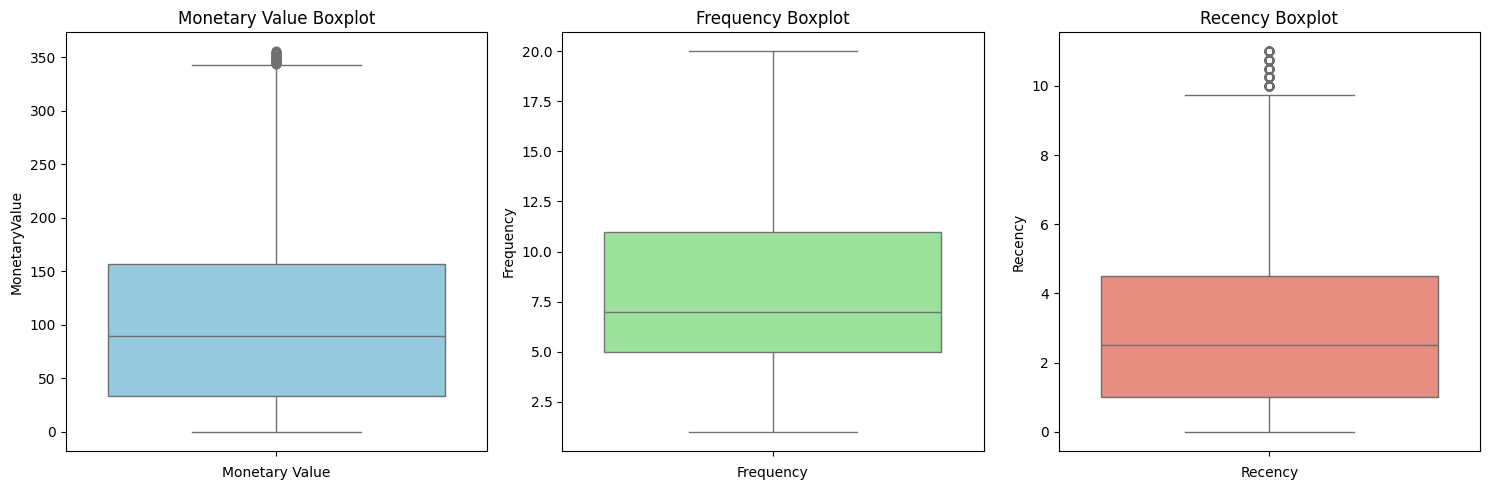

In [84]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

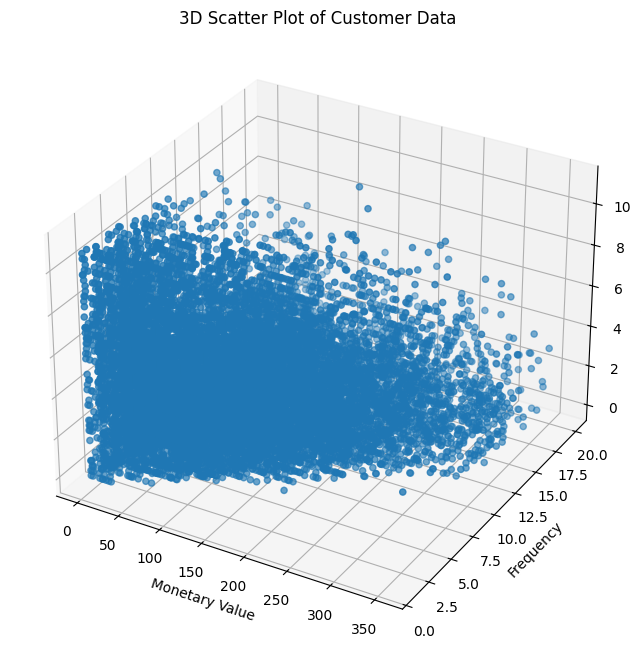

In [85]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(non_outliers_df["MonetaryValue"], non_outliers_df["Frequency"], non_outliers_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

Standard scaling transforms the features of your data to have a mean of 0 and a standard deviation of 1, ensuring that each feature contributes equally to the analysis.

$$
z = \frac{x - \mu}{\sigma}
$$

Where:
- $z$ is the standardized value,
- $x$ is the original value,
- $\mu$ is the mean of the feature,
- $\sigma$ is the standard deviation of the feature.

As a caveat this assumes that our data is normally distribution but it's a fair enough assumption

In [86]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[["MonetaryValue", "Frequency", "Recency"]])

scaled_data

array([[ 0.29094268, -0.05371739, -0.9156766 ],
       [-0.30883151, -0.73322599, -0.24098381],
       [ 1.15385004, -0.05371739, -1.10844597],
       ...,
       [-1.1474439 , -0.73322599,  1.01201709],
       [-0.19209108,  0.85229407, -0.62652255],
       [ 1.51777617,  1.53180267, -0.14459913]], shape=(13084, 3))

This is in numpy array but im going to make data easy to deal by converting to data frame

In [87]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=("MonetaryValue", "Frequency", "Recency"))

scaled_data_df

,MonetaryValue,Frequency,Recency
0,0.29,-0.05,-0.92
1,-0.31,-0.73,-0.24
2,1.15,-0.05,-1.11
3,0.62,0.85,-0.53
4,-0.70,2.21,-0.92
...,...,...,...
14486,2.33,0.63,-0.72
14488,-0.93,-0.51,-0.92
14489,-1.15,-0.73,1.01
14490,-0.19,0.85,-0.63


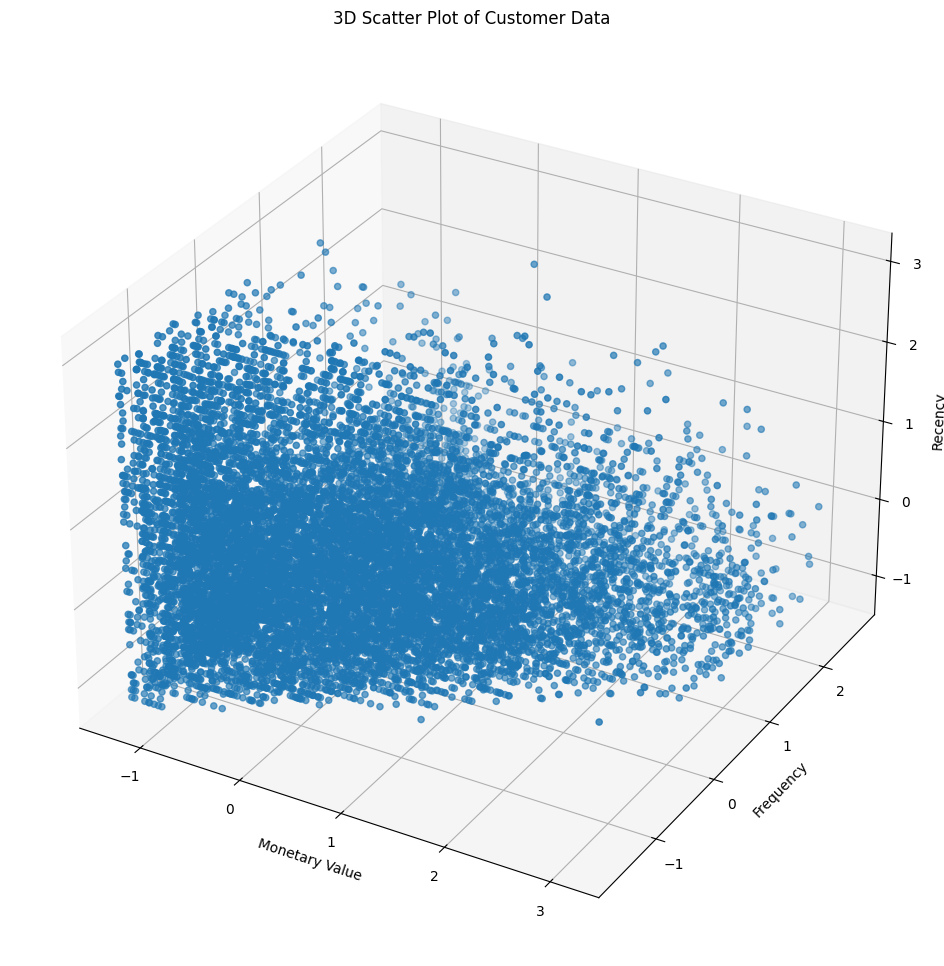

In [88]:
fig = plt.figure(figsize=(12, 12))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_data_df["MonetaryValue"], scaled_data_df["Frequency"], scaled_data_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

K means clustering

To determine how many clusters we're going to use elbow method to determine no. of clusters

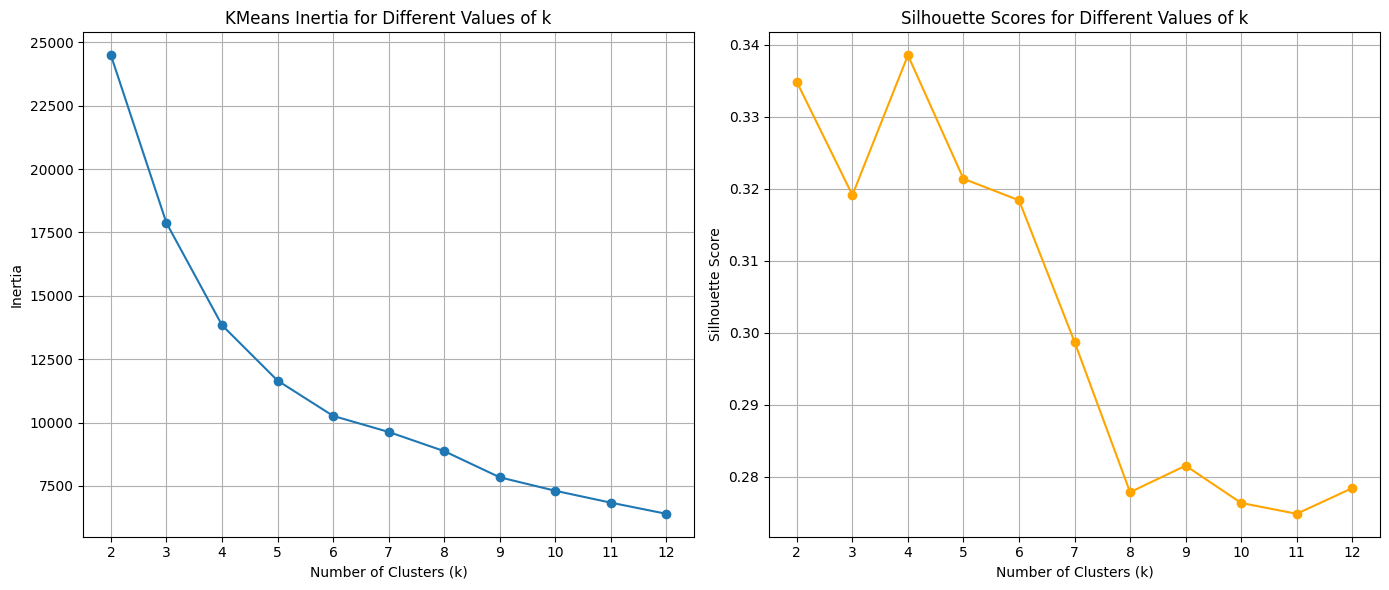

In [89]:
max_k = 12

inertia = []
silhoutte_scores = []
k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    cluster_labels = kmeans.fit_predict(scaled_data_df)

    sil_score = silhouette_score(scaled_data_df, cluster_labels)

    silhoutte_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

In [90]:
import numpy as np

# Prepare a summary DataFrame for the optimal k selection metrics
summary_df = pd.DataFrame({
    'k': list(k_values),
    'Inertia': [int(round(val)) for val in inertia],
    'Silhouette': [round(val, 2) for val in silhoutte_scores]
})

# Format numbers for display
summary_df['Inertia'] = summary_df['Inertia'].apply(lambda x: f"{x:,}")

# Pivot for pretty printing
summary_df_display = summary_df.set_index('k').T
summary_df_display.index = ['Inertia', 'Silhouette']
summary_df_display.columns = [f'k={k}' for k in summary_df_display.columns]

print("Example Output (Optimal k):")
display(summary_df_display)

Example Output (Optimal k):


,k=2,k=3,k=4,k=5,k=6,k=7,k=8,k=9,k=10,k=11,k=12
Inertia,"24,493","17,874","13,842","11,655","10,262","9,628","8,872","7,839","7,307","6,838","6,398"
Silhouette,0.33,0.32,0.34,0.32,0.32,0.30,0.28,0.28,0.28,0.27,0.28


### Silhouette Score

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

Where:
- $s(i)$ is the silhouette score for a single sample $i$
- $a(i)$ is the average distance between $i$ and all other points in the same cluster,
- $b(i)$ is the minimum average distance between $i$ and all points in the nearest cluster to which $i$ does not belong.

The silhoutte score ranges between $[-1, 1]$, a higher value indicates more distinct clusters.

performing K-Means clustering on your dataset.

In [91]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

array([3, 3, 2, ..., 1, 0, 2], shape=(13084,), dtype=int32)

In [ ]:
non_outliers_df["Cluster"] = cluster_labels

non_outliers_df

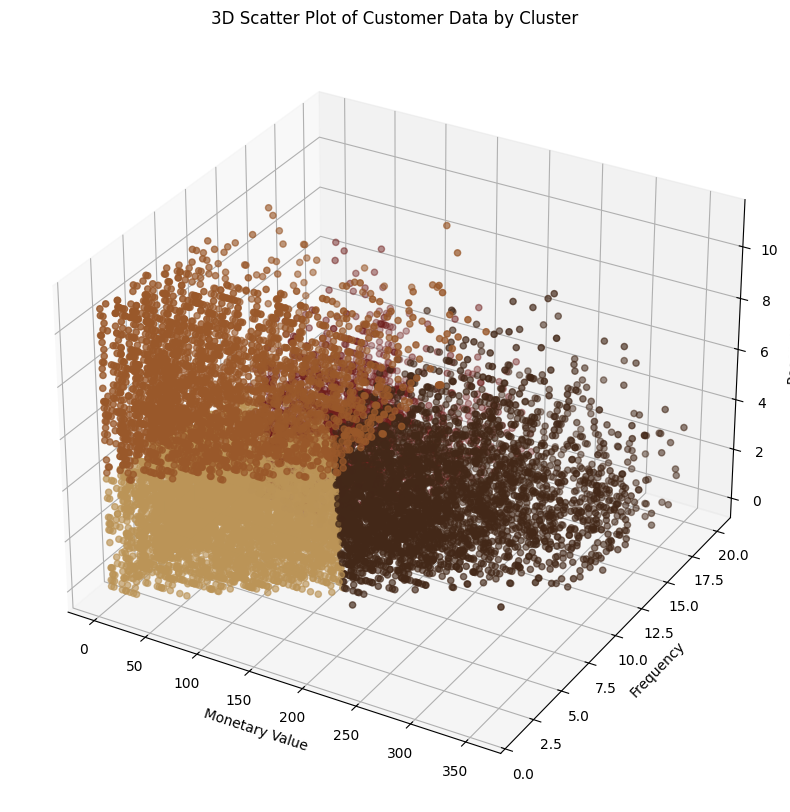

In [93]:
cluster_colors = {0: '#6f1d1b', 
                  1: '#99582a', 
                  2: '#432818',  
                  3: '#bb9457'}  

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'], 
                     non_outliers_df['Frequency'], 
                     non_outliers_df['Recency'], 
                     c=colors,  # Use mapped solid colors
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

In [94]:
import plotly.express as px

# Convert cluster_colors keys to strings for plotly compatibility
color_discrete_map = {str(k): v for k, v in cluster_colors.items()}

fig = px.scatter_3d(
    non_outliers_df,
    x="MonetaryValue",
    y="Frequency",
    z="Recency",
    color="Cluster",
    color_discrete_map=color_discrete_map,
    hover_data=["customer_id", "MonetaryValue", "Frequency", "Recency"],
    title="Interactive 3D Scatter Plot of Customer Data by Cluster"
)
fig.update_traces(marker=dict(size=5))
fig.show()


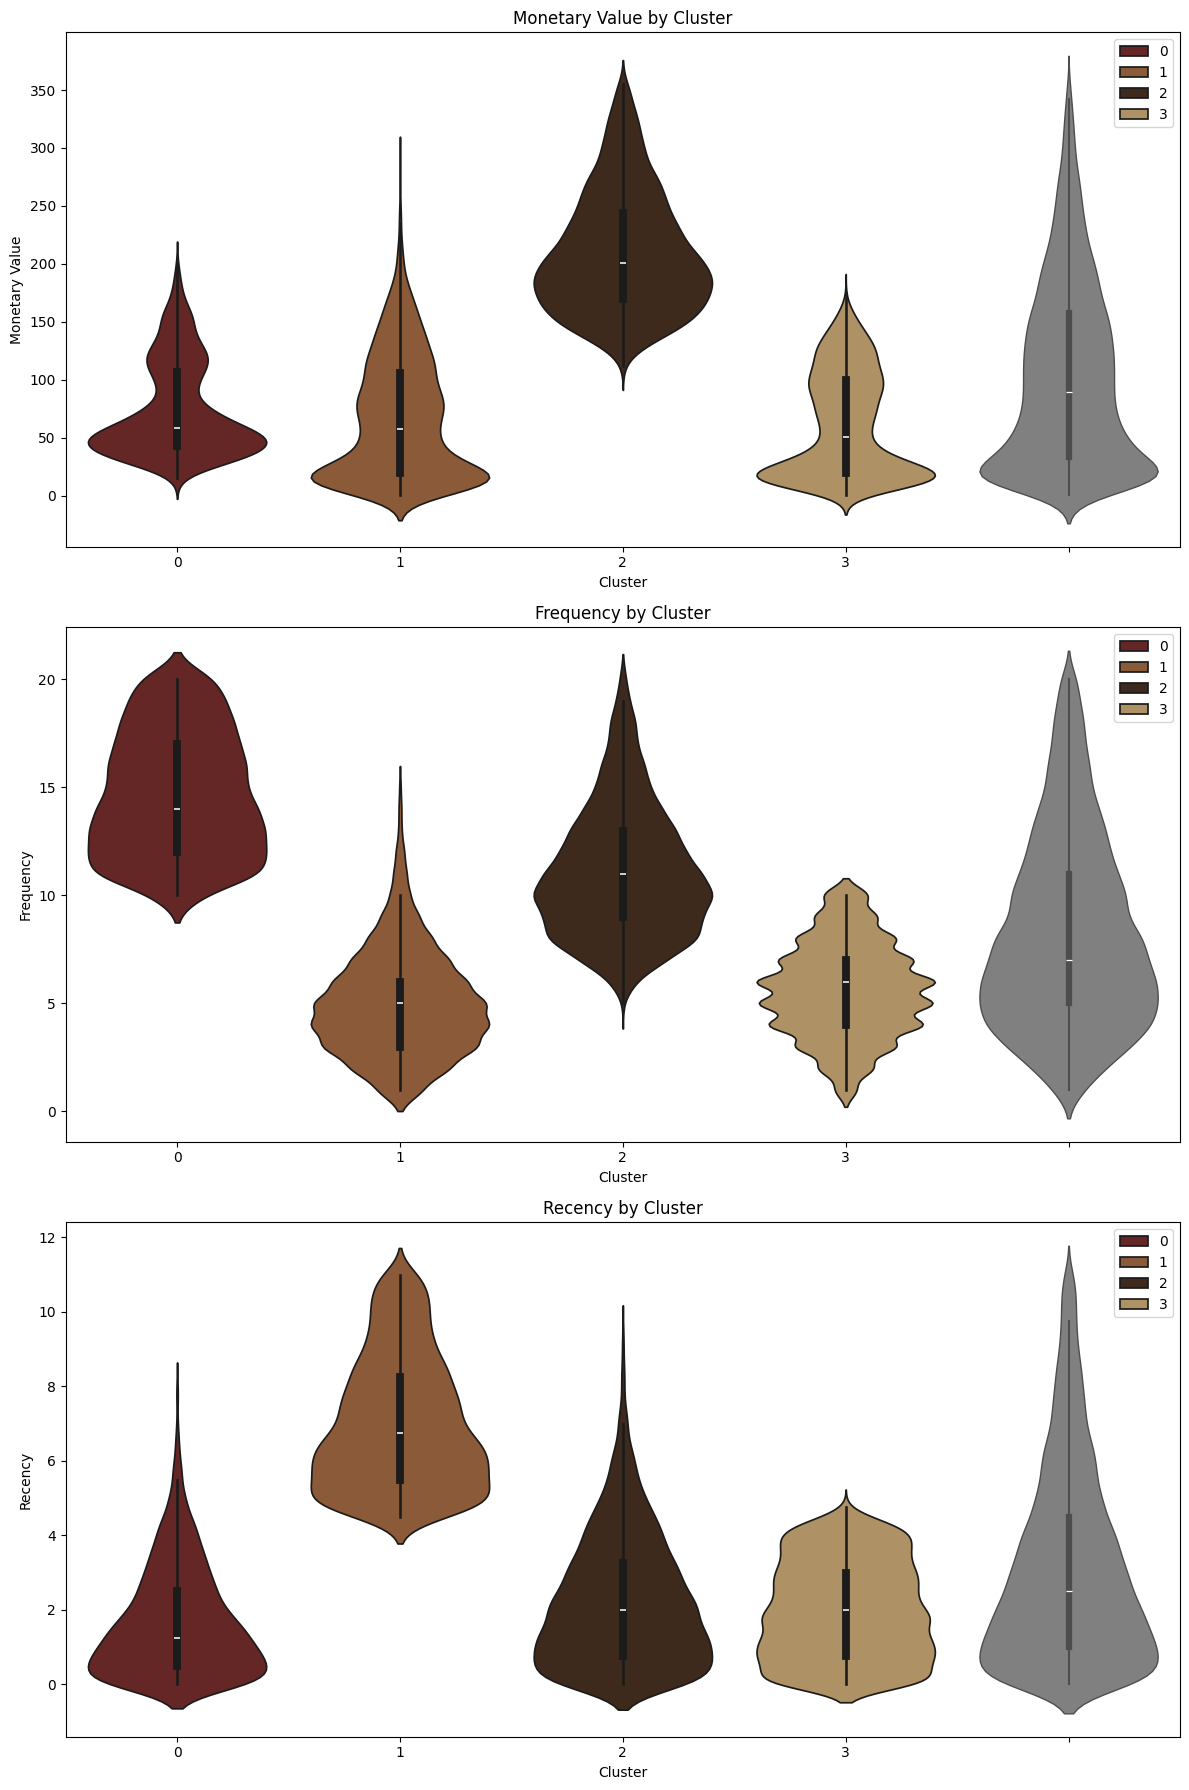

In [95]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')


plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

This code is labeling outliers into distinct custom groups (clusters) based on whether they are outliers in Monetary, Frequency, or Recency, or some combination — and combining them all into a single DataFrame

In [96]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)
recency_overlap_indices = recency_outliers_df.index.intersection(monetary_outliers_df.index.union(frequency_outliers_df.index))

monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
recency_only_outliers = recency_outliers_df.drop(recency_overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
recency_only_outliers["Cluster"] = -3
monetary_and_frequency_outliers["Cluster"] = -4

outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers,recency_only_outliers, monetary_and_frequency_outliers])

outlier_clusters_df

,customer_id,MonetaryValue,Frequency,Recency,Cluster
10,00715b6e55c3431cb56ff7307eb19675,375.12,15,0.50,-1
43,00e9f403afa641889cd034ee7c7ca6e9,614.59,17,0.25,-1
60,01443a2afce54939a323c978f467c540,417.93,16,1.75,-1
76,017febbe52e64ac19cf28cf0d44386e4,1003.41,10,7.00,-1
87,019ed95d987446e3947da0246cdab831,515.09,8,6.25,-1
...,...,...,...,...,...
10972,c06cbc22ae8d4ce39d8c2cdee4272ace,460.52,22,0.75,-4
11925,d237d3afa2cf4463a07e06b9a8fcba0c,400.87,26,2.75,-4
13668,f130699fa7934e2ebbfa0a3f976d645c,405.54,23,2.75,-4
13881,f5205b328b564bf0a55952a8dc19ce6a,395.59,24,0.00,-4


In [97]:
# Total number of outliers (from outlier_clusters_df)
total_outliers = len(outlier_clusters_df)

# Overlap counts
monetary_frequency_overlap = 35
monetary_recency_overlap = 4
frequency_recency_overlap = 0

# Calculate percentages
mf_pct = (monetary_frequency_overlap / total_outliers) * 100
mr_pct = (monetary_recency_overlap / total_outliers) * 100
fr_pct = (frequency_recency_overlap / total_outliers) * 100

print(f"Monetary & Frequency overlap: {monetary_frequency_overlap} ({mf_pct:.2f}%)")
print(f"Monetary & Recency overlap: {monetary_recency_overlap} ({mr_pct:.2f}%)")
print(f"Frequency & Recency overlap: {frequency_recency_overlap} ({fr_pct:.2f}%)")
print(f"Total outliers: {total_outliers}")

Monetary & Frequency overlap: 35 (2.49%)
Monetary & Recency overlap: 4 (0.28%)
Frequency & Recency overlap: 0 (0.00%)
Total outliers: 1408


In [98]:
print("Total outlier records:", outlier_clusters_df.shape[0])
print("Unique records:", outlier_clusters_df.index.nunique())


Total outlier records: 1408
Unique records: 1408


In [99]:
outlier_clusters_df["Cluster"].value_counts()


Cluster
-3    574
-1    435
-2    364
-4     35
Name: count, dtype: int64

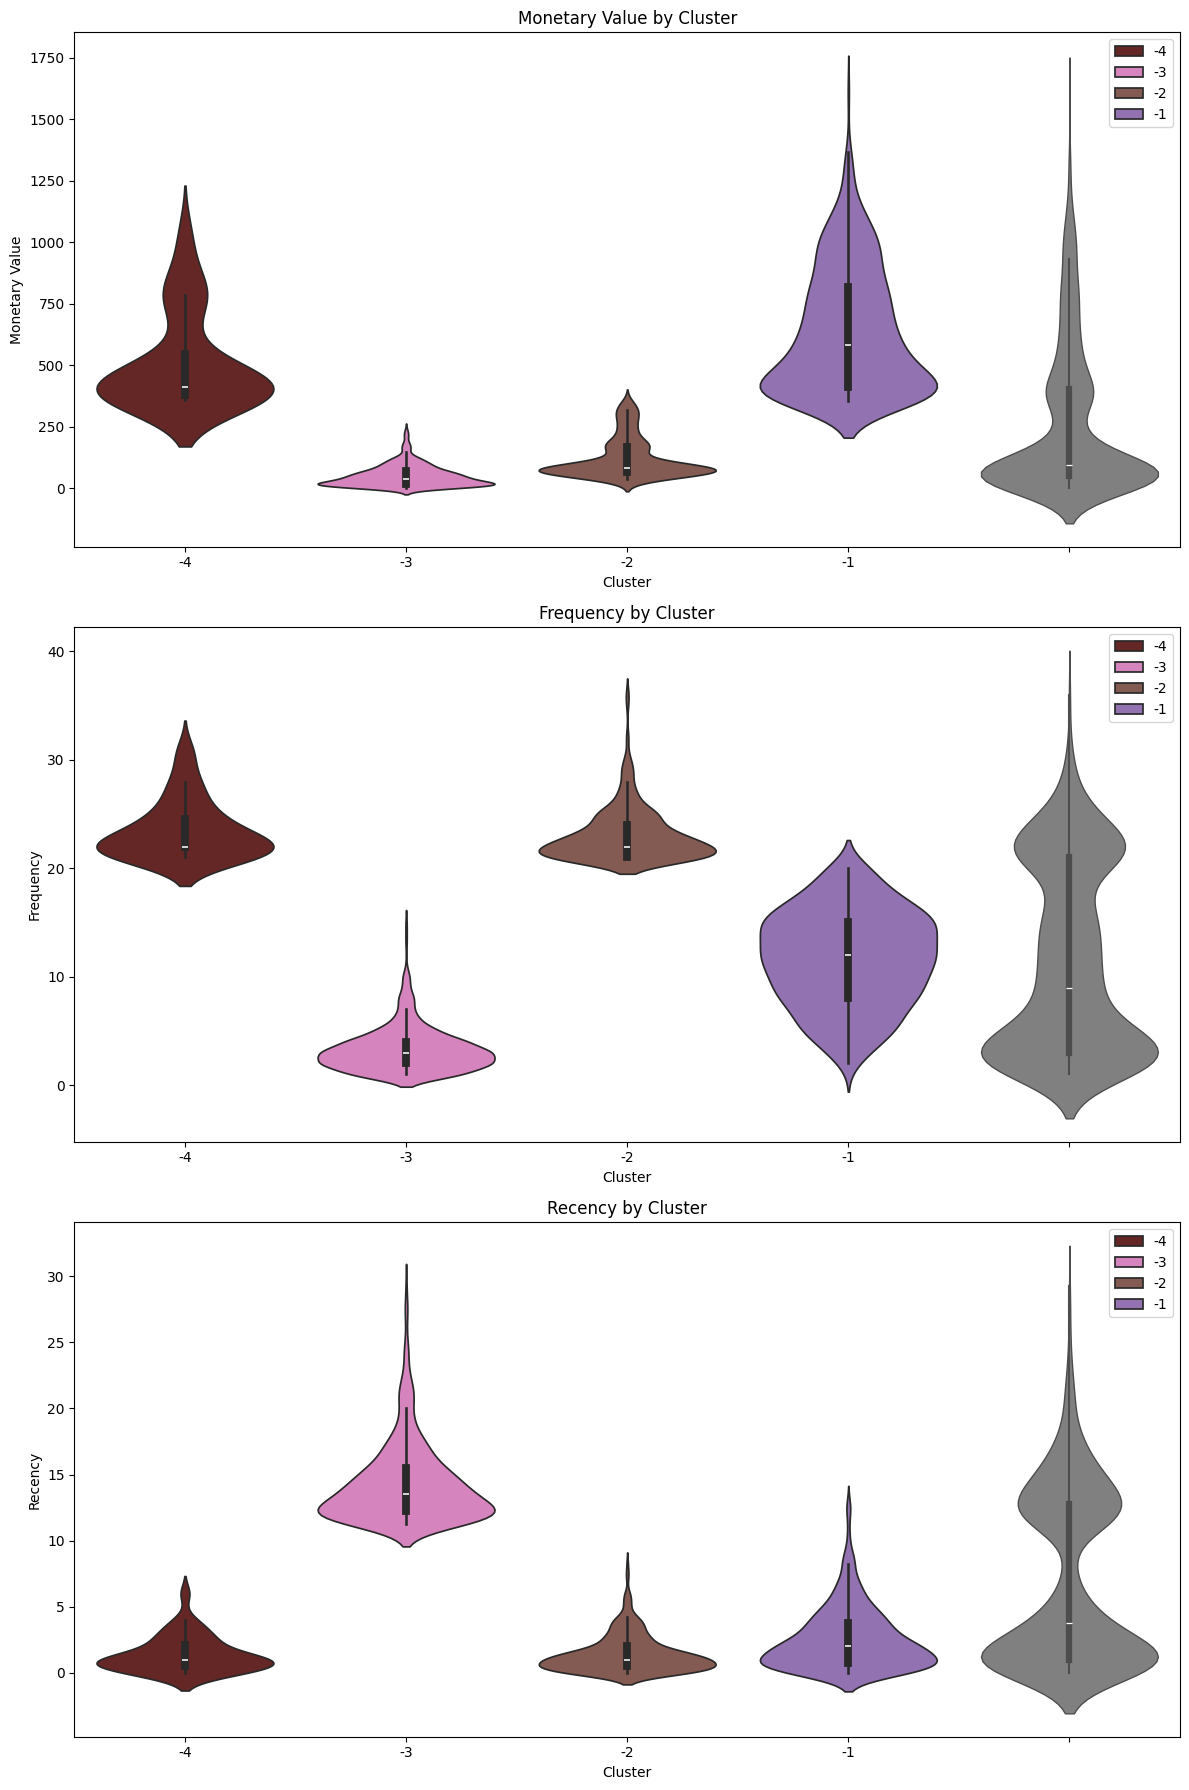

In [100]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2',
                  -4: '#6f1d1b'}

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['MonetaryValue'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

In [101]:
cluster_labels = {
    0: "Loyal Core",             
    1: "Sleeping Buyers",        
    2: "First-Time Buyers",      
    3: "Frequent Shoppers",      
    -1: "High Spenders",         
    -2: "Potential Upgraders",   
    -3: "VIP Customers",         
    -4: "Win-Back Targets"       
}

In [102]:
full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])

full_clustering_df

,customer_id,MonetaryValue,Frequency,Recency,Cluster
0,0009655768c64bdeb2e877511632db8f,127.60,8,0.75,3
1,0011e0d4e6b944f998e987f904e8c1e5,79.46,5,2.50,3
2,0020c2b971eb4e9188eac86d93036a77,196.86,8,0.25,2
3,0020ccbbb6d84e358d3414a3ff76cffd,154.05,12,1.75,2
4,003d66b6608740288d6cc97a6903f4f0,48.34,18,0.75,0
...,...,...,...,...,...
10972,c06cbc22ae8d4ce39d8c2cdee4272ace,460.52,22,0.75,-4
11925,d237d3afa2cf4463a07e06b9a8fcba0c,400.87,26,2.75,-4
13668,f130699fa7934e2ebbfa0a3f976d645c,405.54,23,2.75,-4
13881,f5205b328b564bf0a55952a8dc19ce6a,395.59,24,0.00,-4


In [103]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df

,customer_id,MonetaryValue,Frequency,Recency,Cluster,ClusterLabel
0,0009655768c64bdeb2e877511632db8f,127.60,8,0.75,3,Frequent Shoppers
1,0011e0d4e6b944f998e987f904e8c1e5,79.46,5,2.50,3,Frequent Shoppers
2,0020c2b971eb4e9188eac86d93036a77,196.86,8,0.25,2,First-Time Buyers
3,0020ccbbb6d84e358d3414a3ff76cffd,154.05,12,1.75,2,First-Time Buyers
4,003d66b6608740288d6cc97a6903f4f0,48.34,18,0.75,0,Loyal Core
...,...,...,...,...,...,...
10972,c06cbc22ae8d4ce39d8c2cdee4272ace,460.52,22,0.75,-4,Win-Back Targets
11925,d237d3afa2cf4463a07e06b9a8fcba0c,400.87,26,2.75,-4,Win-Back Targets
13668,f130699fa7934e2ebbfa0a3f976d645c,405.54,23,2.75,-4,Win-Back Targets
13881,f5205b328b564bf0a55952a8dc19ce6a,395.59,24,0.00,-4,Win-Back Targets


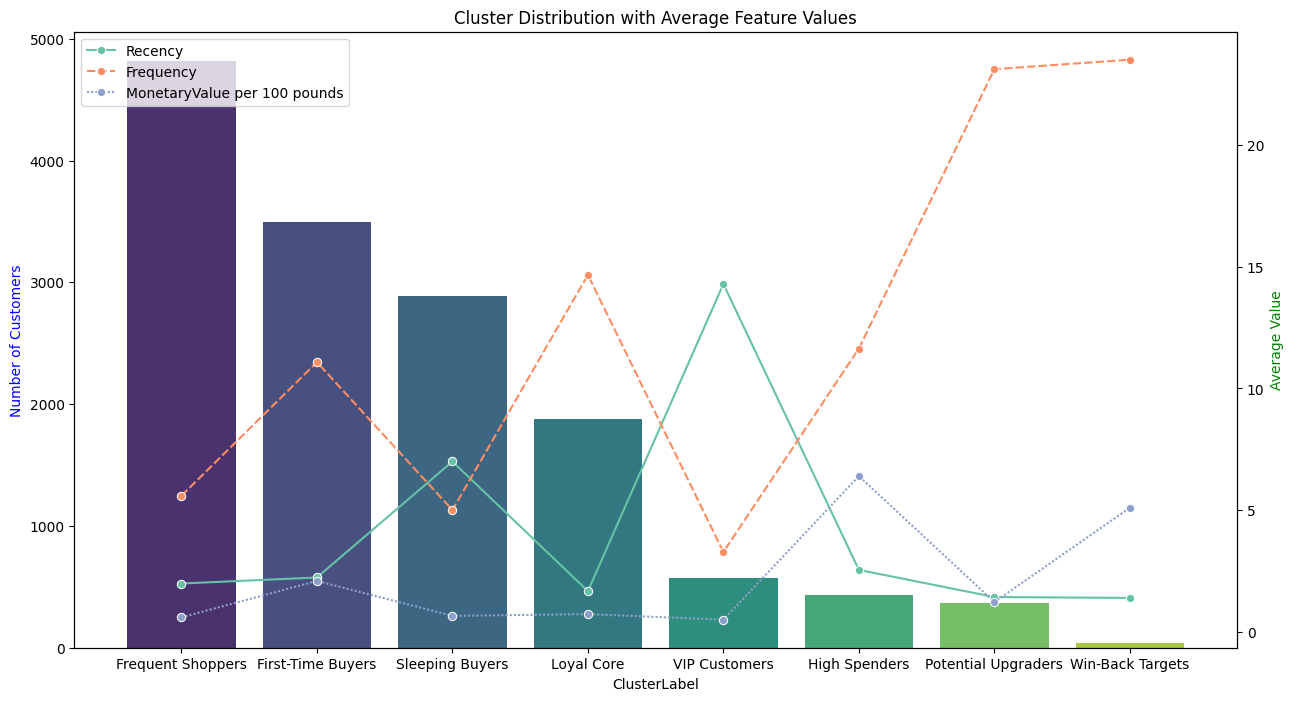

In [104]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(15, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()

To join `full_clustering_df` with `maven_cafe`, use a left merge on `customer_id`. This will add the cluster labels to every transaction/event in `maven_cafe`.

In [105]:
full_export_df = maven_cafe.merge(
    full_clustering_df[['customer_id', 'Cluster', 'ClusterLabel']],
    on='customer_id',
    how='left'
)
full_export_df.to_csv('maven_cafe_with_clusters.csv', index=False)

In [117]:
full_export_df

,customer_id,event,value,Amount,became_member_on,gender,age,income,offer_id,offer_type,difficulty,reward,duration,channels,time_in_days,web,email,mobile,social,age_group,income_group,Cluster,ClusterLabel
0,0009655768c64bdeb2e877511632db8f,offer viewed,fafdcd668e3743c1bb461111dcafc2a4,NaN,2017-04-21,M,33.00,72000.00,fafdcd668e3743c1bb461111dcafc2a4,discount,10.00,2.00,10.00,"['web', 'email', 'mobile', 'social']",22.50,1,1,1,1,Early Career Professionals,Middle Income,3.00,Frequent Shoppers
1,0009655768c64bdeb2e877511632db8f,offer received,5a8bc65990b245e5a138643cd4eb9837,NaN,2017-04-21,M,33.00,72000.00,5a8bc65990b245e5a138643cd4eb9837,informational,0.00,0.00,3.00,"['email', 'mobile', 'social']",7.00,0,1,1,1,Early Career Professionals,Middle Income,3.00,Frequent Shoppers
2,0009655768c64bdeb2e877511632db8f,offer received,f19421c1d4aa40978ebb69ca19b0e20d,NaN,2017-04-21,M,33.00,72000.00,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5.00,5.00,5.00,"['web', 'email', 'mobile', 'social']",17.00,1,1,1,1,Early Career Professionals,Middle Income,3.00,Frequent Shoppers
3,0009655768c64bdeb2e877511632db8f,transaction,NaN,8.57,2017-04-21,M,33.00,72000.00,NaN,NaN,NaN,NaN,NaN,NaN,17.25,0,0,0,0,Early Career Professionals,Middle Income,3.00,Frequent Shoppers
4,0009655768c64bdeb2e877511632db8f,offer viewed,f19421c1d4aa40978ebb69ca19b0e20d,NaN,2017-04-21,M,33.00,72000.00,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5.00,5.00,5.00,"['web', 'email', 'mobile', 'social']",19.00,1,1,1,1,Early Career Professionals,Middle Income,3.00,Frequent Shoppers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272383,ffff82501cea40309d5fdd7edcca4a07,offer completed,fafdcd668e3743c1bb461111dcafc2a4,NaN,2016-11-25,F,45.00,62000.00,fafdcd668e3743c1bb461111dcafc2a4,discount,10.00,2.00,10.00,"['web', 'email', 'mobile', 'social']",2.50,1,1,1,1,Mature Professionals,Middle Income,2.00,First-Time Buyers
272384,ffff82501cea40309d5fdd7edcca4a07,offer completed,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,2016-11-25,F,45.00,62000.00,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5.00,5.00,7.00,"['web', 'email', 'mobile']",21.00,1,1,1,0,Mature Professionals,Middle Income,2.00,First-Time Buyers
272385,ffff82501cea40309d5fdd7edcca4a07,offer viewed,fafdcd668e3743c1bb461111dcafc2a4,NaN,2016-11-25,F,45.00,62000.00,fafdcd668e3743c1bb461111dcafc2a4,discount,10.00,2.00,10.00,"['web', 'email', 'mobile', 'social']",0.25,1,1,1,1,Mature Professionals,Middle Income,2.00,First-Time Buyers
272386,ffff82501cea40309d5fdd7edcca4a07,offer completed,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,2016-11-25,F,45.00,62000.00,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,20.00,5.00,10.00,"['web', 'email']",8.25,1,1,0,0,Mature Professionals,Middle Income,2.00,First-Time Buyers
